## Word counts with bag-of-words

- learn how to identify the who, what, and where of texts using pre-trained models on English and non-English text. 
- also learn how to use some new libraries, polyglot and spaCy, to add to NLP toolbox.

In [1]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import pos_tag, ne_chunk_sents



### NER with NLTK
- use nltk to find the named entities in the article.

In [2]:
with open('News articles/uber_apple.txt',mode= 'r',encoding="utf-8" ) as file:
    article = file.read()

In [3]:
# Tokenize the article into sentences: sentences
sentences =  sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [ word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [ pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences =  ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
        for chunk in sent:
            if hasattr(chunk, "label") and chunk.label() == "NE":
                print(chunk)

            

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


### Charting practice
- use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

- use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. 
- create a chunked sentence list with non-binary category names.


In [4]:
from collections import defaultdict
import matplotlib.pyplot as plt

In [5]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]



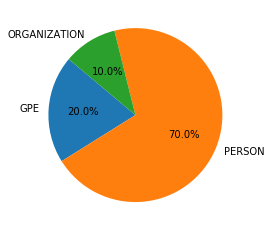

In [6]:
# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

In [7]:
# Import spacy
import spacy


# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm',tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ORG unroll.me
ORG Apple
PERSON Uber
FAC Travis Kalanick of Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


In [8]:

import polyglot
from polyglot.text import Text, Word
from polyglot.downloader import downloader



In [9]:
text = Text("Bonjour, Mesdames.")
print("Language Detected: Code={}, Name={}\n".format(text.language.code, text.language.name))

Language Detected: Code=fr, Name=French



In [10]:
zen = Text("Beautiful is better than ugly. "
           "Explicit is better than implicit. "
           "Simple is better than complex.")
print(zen.words)

['Beautiful', 'is', 'better', 'than', 'ugly', '.', 'Explicit', 'is', 'better', 'than', 'implicit', '.', 'Simple', 'is', 'better', 'than', 'complex', '.']


In [11]:
with open('News articles/french.txt',mode= 'r',encoding="utf-8" ) as file:
    article = file.read()

# download use poly16 with polyglot_path
#!polyglot download ner2.fr
#!polyglot download embeddings2.fr

In [12]:
from polyglot.text import Text

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


In [13]:
txt

Text("﻿édition abonné


Dans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.


Le Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)


TRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supp... apprentissage sur des paramètres pour lesquels une vision humaine n’explique pas pourquoi ils marchent si bien dans un contexte donné.


C’est aussi ce que dit le rapport de l’Office parlementaire d’évaluation des choix scientifiques et technologiques (« Pour une intelligence artificielle maîtrisée, utile et démystifiée », 29 mars 2017), pour qui ce côté « boîte noire » explique des angoisses infondées. Ethiquement, se fonder sur l’IA pour des tâches critiques sans bien comprendre le c

In [14]:
txt.entities

[I-PER(['Charles', 'Cuvelliez']),
 I-PER(['Charles', 'Cuvelliez']),
 I-ORG(['Bruxelles']),
 I-PER(['l’IA']),
 I-PER(['Julien', 'Maldonato']),
 I-ORG(['Deloitte']),
 I-PER(['Ethiquement']),
 I-LOC(['l’IA']),
 I-PER(['.'])]

In [15]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]
# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


In [16]:
#!polyglot download ner2.es 
#!polyglot download embeddings2.es
with open('News articles/spanish.txt', 'r') as file:
    article = file.read()

In [17]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article, )

print("Language Detected: Code={}, Name={}\n".format(txt.language.code, txt.language.name))


Language Detected: Code=es, Name=Spanish



In [18]:
txt = Text(article, hint_language_code='es')
txt.entities

[I-PER(['Lina']),
 I-PER(['Castillo']),
 I-PER(['Teresa', 'Lozano', 'Long']),
 I-ORG(['Universidad', 'de', 'Texas']),
 I-PER(['Austin']),
 I-LOC(['Austin', '.']),
 I-PER(['Austin', '.', 'Ella']),
 I-PER(['Gabriel', 'García', 'Márquez']),
 I-PER(['Gabriel', 'García', 'Márquez']),
 I-PER(['LIna']),
 I-PER(['Castillo']),
 I-LOC(['colombiano']),
 I-LOC(['Colombia']),
 I-LOC(['Estados', 'Unidos']),
 I-PER(['Castillo']),
 I-ORG(['Nation']),
 I-PER(['Kenneth', 'Nebenzahl']),
 I-PER(['Jr']),
 I-ORG(['Library']),
 I-ORG(['Society']),
 I-LOC(['Humboldt']),
 I-LOC(['América', 'Latina']),
 I-PER(['Gabriel', 'García', 'Márquez']),
 I-PER(['Gabo']),
 I-PER(['Fidel', 'Castro']),
 I-PER(['Gabo']),
 I-PER(['Castro']),
 I-LOC(['colombianos']),
 I-PER(['Gabo']),
 I-LOC(['colombiano']),
 I-PER(['colombiano', 'Belisario', 'Betancur']),
 I-PER(['Betancur']),
 I-ORG(['Fuerzas', 'Armadas', 'Revolucionarias', 'de', 'Colombia']),
 I-ORG(['FARC']),
 I-PER(['Gabo']),
 I-LOC(['Cuba']),
 I-PER(['Betancur']),
 I-PER

In [19]:

# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if ('Márquez' in ent) or ('Gabo' in ent):
        count += 1
        print(ent)

# Print count
print(count)
print(len(txt.entities))
#print(txt.entities)

['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['Gabo']
['Gabo']
['Gabo']
['Gabo']
['Gabo']
['Gabriel', 'García', 'Márquez']
['Gabo']
['Gabo']
['García', 'Márquez']
['Gabo']
['Gabo']
['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['.', 'Gabriel', 'García', 'Márquez']
['Gabo']
['Gabo']
['Gabo']
['Gabriel', 'García', 'Márquez']
['García', 'Márquez']
['García', 'Márquez']
['Gabo']
['Gabo']
['García', 'Márquez']
['Gabriel', 'García', 'Márquez']
29
103


In [20]:

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

0.2815533980582524
